<a href="https://colab.research.google.com/github/astefano/CF_XAI/blob/main/freecodecamp_time_series_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews.csv


In [11]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col=0)

In [15]:
df.size

1304

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [13]:
from pandas.plotting import register_matplotlib_converters

In [24]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [25]:
df.size

1238

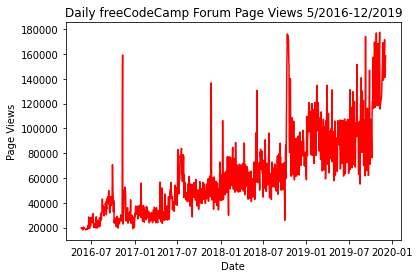

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(df['value'], color='red')#, marker='o')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')#, fontsize=14)
plt.xlabel('Date')#, fontsize=14)
plt.ylabel('Page Views')#, fontsize=14)
#plt.grid(True)
plt.show()
plt.savefig('line_plot.png')

In [42]:
df['year'] = df.index.year
df['month'] = df.index.month_name()

In [43]:
print(df)

             value  year     month
date                              
2016-05-19   19736  2016       May
2016-05-26   18060  2016       May
2016-05-27   19997  2016       May
2016-05-28   19044  2016       May
2016-05-29   20325  2016       May
...            ...   ...       ...
2019-11-24  138875  2019  November
2019-11-29  171584  2019  November
2019-11-30  141161  2019  November
2019-12-01  142918  2019  December
2019-12-03  158549  2019  December

[1238 rows x 3 columns]


In [44]:
df_bar = df.pivot_table(index='year', columns='month', values='value', aggfunc='sum')

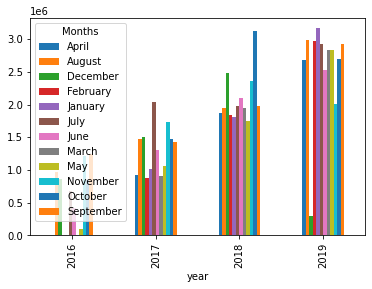

In [53]:
fig, ax = plt.subplots()
df_bar.plot(kind='bar', ax=ax)
plt.legend(loc='upper left', title='Months')
plt.show()

In [54]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [62]:
df_box=df_box.sort_values('month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)

In [63]:
print(df_box)

           date   value  year month
210  2017-01-06   37353  2017   Jan
937  2019-01-06   94108  2019   Jan
936  2019-01-05   77897  2019   Jan
935  2019-01-04   94514  2019   Jan
934  2019-01-03  100710  2019   Jan
...         ...     ...   ...   ...
567  2017-12-29   72819  2017   Dec
566  2017-12-28   51018  2017   Dec
565  2017-12-27   43075  2017   Dec
201  2016-12-28   28424  2016   Dec
1237 2019-12-03  158549  2019   Dec

[1238 rows x 4 columns]


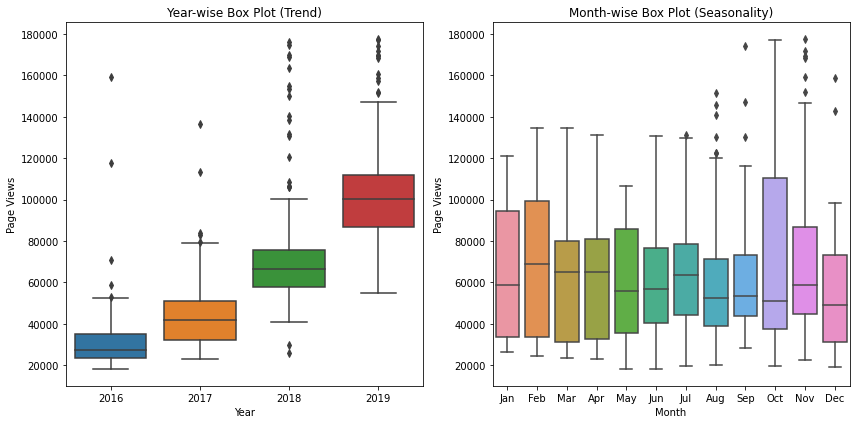

In [73]:
fig, ax = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True
sns.boxplot(x='year', y='value', data=df_box, ax=ax[0]).set(
    xlabel='Year', 
    ylabel='Page Views',
    title="Year-wise Box Plot (Trend)")
sns.boxplot(x='month', y='value', data=df_box, ax=ax[1]).set(
    xlabel='Month', 
    ylabel='Page Views',
    title='Month-wise Box Plot (Seasonality)')
plt.show()